In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import joblib

In [6]:
df = pd.read_csv("sms.tsv.txt", sep='\t', header=None, names=['label', 'message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['label_num'] = df.label.map({'Not spam': 0, 'spam': 1})


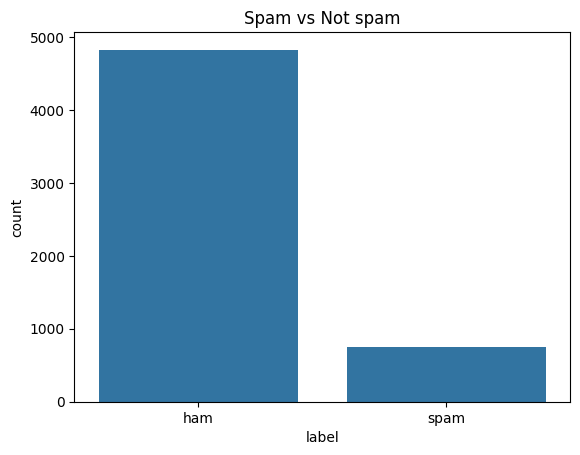

In [18]:
sns.countplot(x='label', data=df)
plt.title("Spam vs Not spam")
plt.show()

In [9]:
X = df['message']
y = df['label_num']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [11]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [12]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [13]:
y_pred = model.predict(X_test_vec)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9885139985642498

📊 Confusion Matrix:
 [[1203    4]
 [  12  174]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1207
           1       0.98      0.94      0.96       186

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [19]:
def predict_message(msg):
    msg_vec = vectorizer.transform([msg])
    prediction = model.predict(msg_vec)
    return 'Spam' if prediction[0] == 1 else 'Not spam'


In [20]:
print("\n🧪 Test Message: ", predict_message("HII how are you ?"))



🧪 Test Message:  Not spam
